A dataset was collected from Kaggle that includes a defined continuous variable, Salary, which serves as the target variable. The dataset also contains six independent variables comprising both continuous and categorical features. The objective of this study is to develop a predictive model that estimates an individual’s salary based on the given independent variables.

In [1]:
#Imported all the libraries I could think of.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
#Now the models
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor


#Now the
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression

from google.colab import files  # import files module


1. Loading the data.


In [2]:
#Loaded the data as dt1.

dt1 = pd.read_csv('salary_prediction_data.csv')

2. Understanding and checking the data 5 ways.

In [3]:
dt1.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [4]:
dt1.shape

(1000, 7)

In [5]:
dt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [6]:
dt1.describe()

,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [7]:
print(dt1)

       Education  Experience  Location Job_Title  Age  Gender         Salary
0    High School           8     Urban   Manager   63    Male   84620.053665
1            PhD          11  Suburban  Director   59    Male  142591.255894
2       Bachelor          28  Suburban   Manager   61  Female   97800.255404
3    High School          29     Rural  Director   45    Male   96834.671282
4            PhD          25     Urban   Analyst   26  Female  132157.786175
..           ...         ...       ...       ...  ...     ...            ...
995  High School           8  Suburban   Analyst   25  Female   64683.389864
996  High School          24     Urban  Engineer   30  Female   74468.205020
997       Master          18     Rural   Analyst   44    Male   98207.026024
998     Bachelor          27  Suburban  Director   31  Female  108544.922720
999  High School          25     Urban  Director   41  Female   71077.000066

[1000 rows x 7 columns]


3. Cleaning the data.

In [8]:
dt1.isnull().values.any()

np.False_

In [9]:
print("There is {} missing values in data frame".format(dt1.isnull().sum().sum()))

There is 0 missing values in data frame


In [10]:
print("There is {} duplicated values in data frame".format(dt1.duplicated().sum()))

There is 0 duplicated values in data frame


As we can see there are no missing, null, or duplicate values.
And now we move on to the data visualization.

In [11]:
len(dt1.columns)

7

In [12]:
numerical_columns = ['Experience', 'Age', 'Salary']

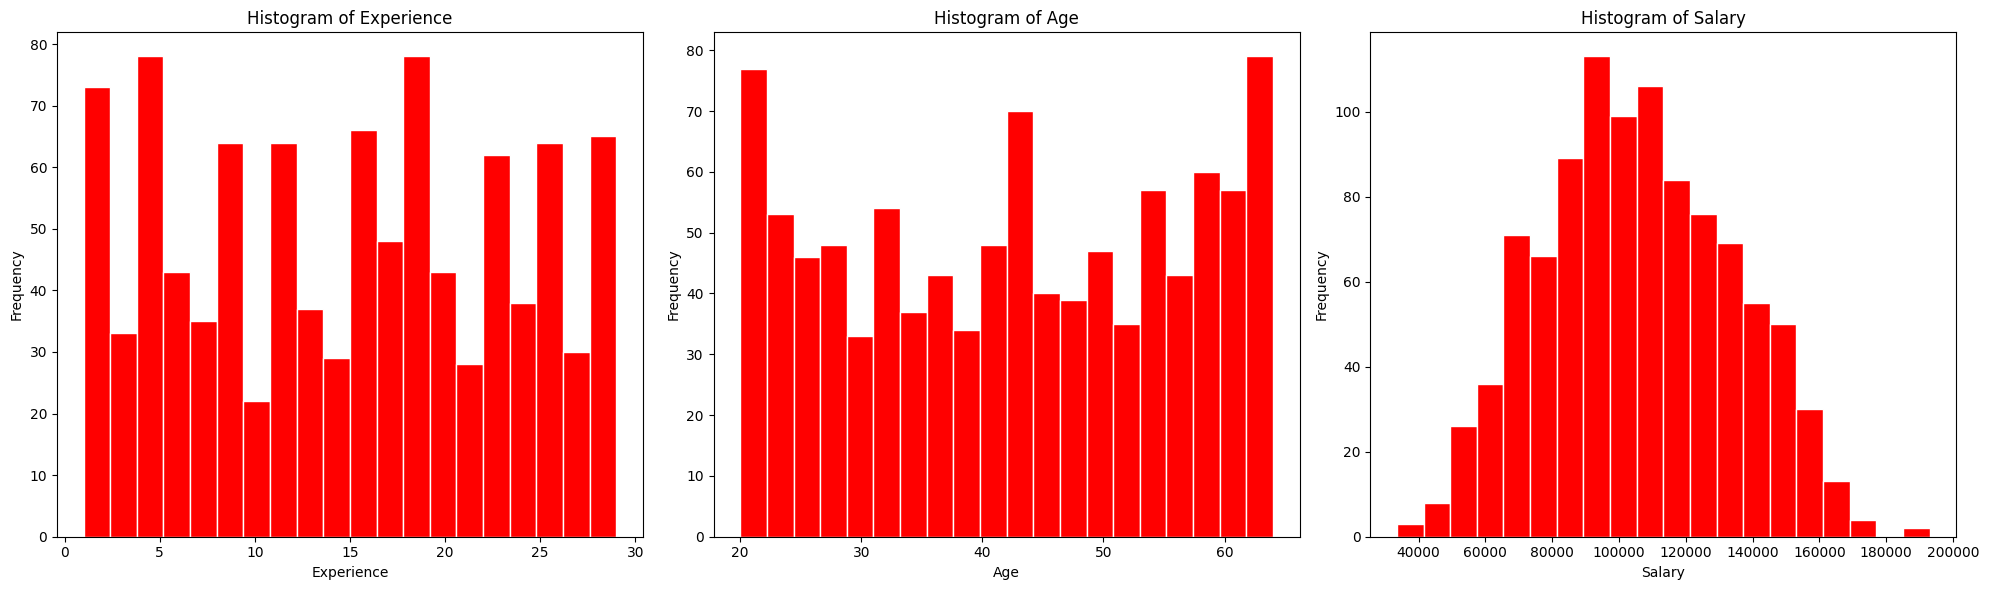

In [13]:
#Created a histogram with the numericals only.

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes = axes.flatten()

for i, column in enumerate(numerical_columns):
        axes[i].hist(dt1[column], bins=20, color='red', edgecolor='white')
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Created histograms for numericals. Column charts for the other 4.

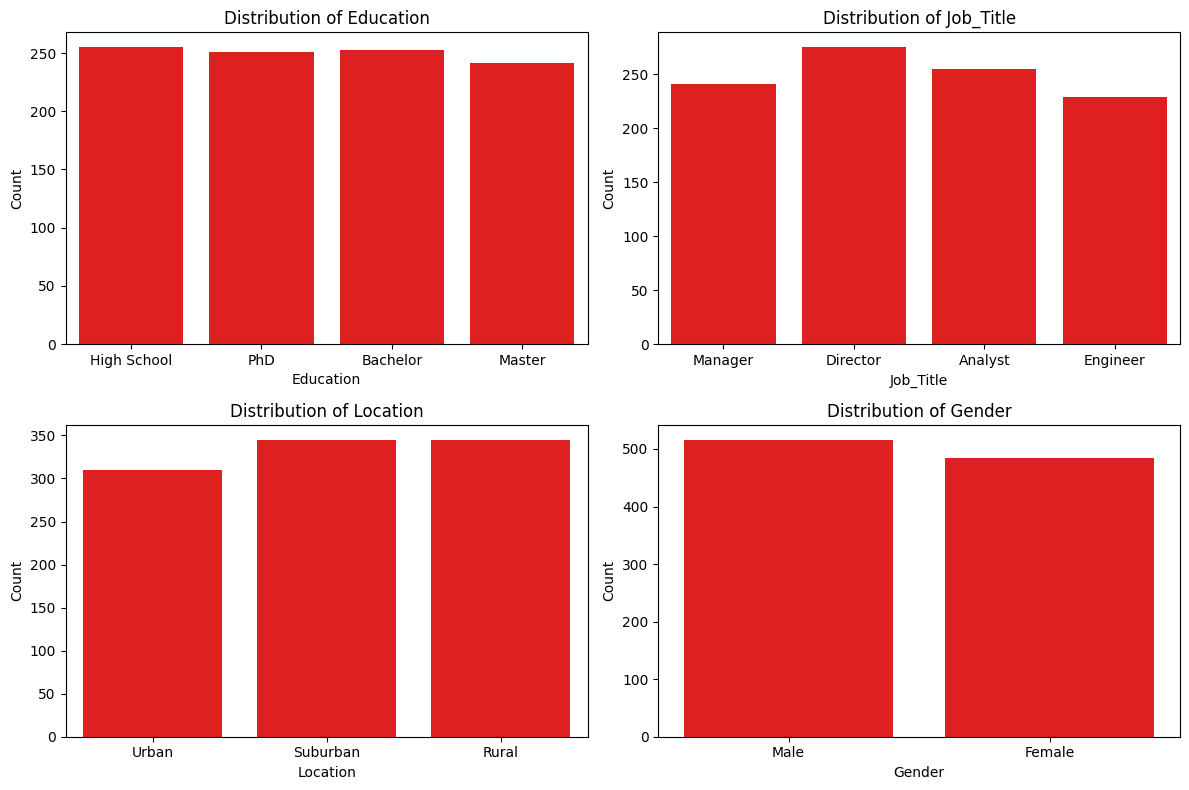

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data=dt1, x='Education', color='red', ax=axes[0,0])
axes[0,0].set_title('Distribution of Education')
axes[0,0].set_xlabel('Education')
axes[0,0].set_ylabel('Count')

sns.countplot(data=dt1, x='Job_Title', color='red', ax=axes[0,1])
axes[0,1].set_title('Distribution of Job_Title')
axes[0,1].set_xlabel('Job_Title')
axes[0,1].set_ylabel('Count')

sns.countplot(data=dt1, x='Location', color='red', ax=axes[1,0])
axes[1,0].set_title('Distribution of Location')
axes[1,0].set_xlabel('Location')
axes[1,0].set_ylabel('Count')

sns.countplot(data=dt1, x='Gender', color='red', ax=axes[1,1])
axes[1,1].set_title('Distribution of Gender')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()

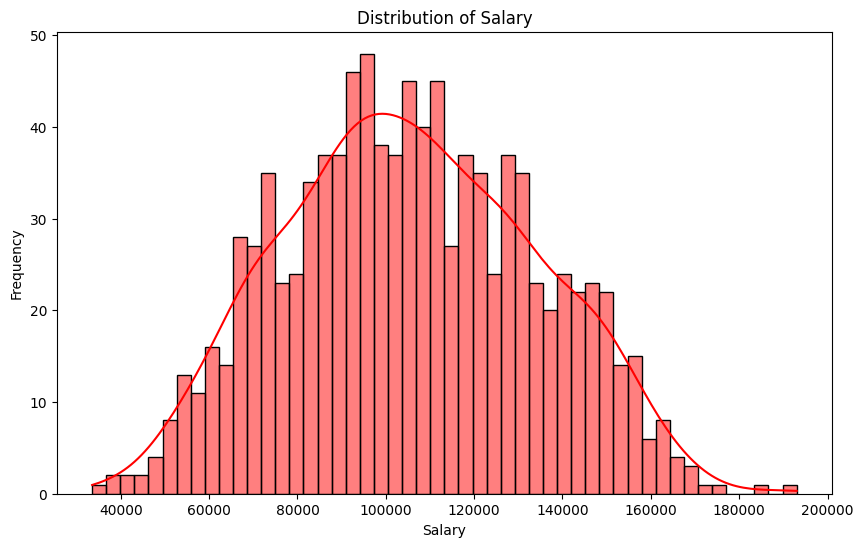

In [15]:
#Seperate distribution for Salary because this is the target variable.

plt.figure(figsize=(10, 6))
sns.histplot(dt1['Salary'], color='red', kde=True, bins=50)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

Now that we're done with visualization and have a better understanding of the dataset, we move on to calculations.

In [16]:
#Only numericals because have not yet done OneHotEncoding.

correlation_matrix = dt1.corr(numeric_only=True)

In [17]:
correlation_matrix

,Experience,Age,Salary
Experience,1.000000,0.044296,0.341918
Age,0.044296,1.000000,-0.053174
Salary,0.341918,-0.053174,1.000000


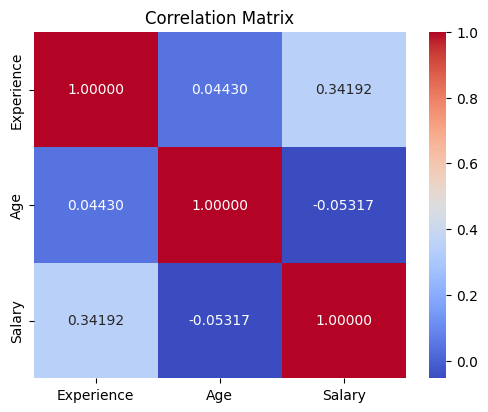

In [24]:
#Showed correlation results in a heatmap.

correlation_matrix = dt1.corr(numeric_only=True)

plt.figure(figsize=(6, 4.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.5f')
plt.title('Correlation Matrix')
plt.show()

In [25]:
#Time to turn those texutal values into numbers.

encoder = OneHotEncoder(sparse_output=False)
encoded_Education = encoder.fit_transform(dt1[['Education']])
encoded_Job_Title = encoder.fit_transform(dt1[['Job_Title']])
encoded_Location = encoder.fit_transform(dt1[['Location']])
encoded_Gender = encoder.fit_transform(dt1[['Gender']])

In [ ]:
encoded_Education

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
encoded_Job_Title

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [ ]:
encoded_Location

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
encoded_Gender

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Add the old numerical values and the newly turned numerical values into one dataframe for operations later.

In [ ]:
#Select numeric columns. I gave the numeric dataframe dt2 and the onehotencoded categorical dataframe dt3 as name.
dt2 = dt1.select_dtypes(include=['float64', 'int64'])

#Merge the categorical columns together.
encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(dt1[['Education', 'Location', 'Gender', 'Job_Title']])
dt3 = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(['Education','Location','Gender','Job_Title']))

#Combine numeric + encoded categorical.
all_data = pd.concat([dt2, dt3], axis=1)

#Correlation matrix.
correlation_matrix = all_data.corr()

A new dataset is created named all_data. This is the final one to be worked on.

Checked the new all_data set for any mistakes, null values, missing values.

In [ ]:
all_data.head()

,Experience,Age,Salary,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Gender_Female,Gender_Male,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager
0,8,63,84620.053665,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,11,59,142591.255894,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,28,61,97800.255404,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,29,45,96834.671282,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,25,26,132157.786175,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Experience             1000 non-null   int64  
 1   Age                    1000 non-null   int64  
 2   Salary                 1000 non-null   float64
 3   Education_Bachelor     1000 non-null   float64
 4   Education_High School  1000 non-null   float64
 5   Education_Master       1000 non-null   float64
 6   Education_PhD          1000 non-null   float64
 7   Location_Rural         1000 non-null   float64
 8   Location_Suburban      1000 non-null   float64
 9   Location_Urban         1000 non-null   float64
 10  Gender_Female          1000 non-null   float64
 11  Gender_Male            1000 non-null   float64
 12  Job_Title_Analyst      1000 non-null   float64
 13  Job_Title_Director     1000 non-null   float64
 14  Job_Title_Engineer     1000 non-null   float64
 15  Job_T

In [ ]:
all_data.describe()

,Experience,Age,Salary,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Gender_Female,Gender_Male,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239,0.253000,0.255000,0.241000,0.251000,0.345000,0.345000,0.310000,0.484000,0.516000,0.255000,0.275000,0.229000,0.241000
std,8.341111,13.609412,28256.972075,0.434948,0.436079,0.427904,0.433805,0.475606,0.475606,0.462725,0.499994,0.499994,0.436079,0.446738,0.420399,0.427904
min,1.000000,20.000000,33510.510669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,30.000000,85032.141517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,43.000000,104314.518315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,22.000000,55.000000,126804.047524,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,29.000000,64.000000,193016.602150,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
all_data.isnull().values.any()

np.False_

In [ ]:
missing_values = all_data.isnull().sum()

In [ ]:
missing_values

,0
Experience,0
Age,0
Salary,0
Education_Bachelor,0
Education_High School,0
Education_Master,0
Education_PhD,0
Location_Rural,0
Location_Suburban,0
Location_Urban,0


In [ ]:
all_data.shape

(1000, 16)

In [ ]:
len(all_data.columns)

16

In [ ]:
print(all_data)

     Experience  Age         Salary  Education_Bachelor  \
0             8   63   84620.053665                 0.0   
1            11   59  142591.255894                 0.0   
2            28   61   97800.255404                 1.0   
3            29   45   96834.671282                 0.0   
4            25   26  132157.786175                 0.0   
..          ...  ...            ...                 ...   
995           8   25   64683.389864                 0.0   
996          24   30   74468.205020                 0.0   
997          18   44   98207.026024                 0.0   
998          27   31  108544.922720                 1.0   
999          25   41   71077.000066                 0.0   

     Education_High School  Education_Master  Education_PhD  Location_Rural  \
0                      1.0               0.0            0.0             0.0   
1                      0.0               0.0            1.0             0.0   
2                      0.0               0.0          

In [ ]:
#Since no problems found, we shall continue with correlation matrix among all the features.

correlation_matrix

,Experience,Age,Salary,Education_Bachelor,Education_High School,Education_Master,Education_PhD,Location_Rural,Location_Suburban,Location_Urban,Gender_Female,Gender_Male,Job_Title_Analyst,Job_Title_Director,Job_Title_Engineer,Job_Title_Manager
Experience,1.000000,0.044296,0.341918,0.005777,-0.016403,-0.018457,0.028903,-0.091846,0.019935,0.073912,0.020602,-0.020602,-0.066214,0.001336,0.045514,0.021368
Age,0.044296,1.000000,-0.053174,-0.016299,0.075877,-0.013039,-0.047072,-0.011763,0.034322,-0.023187,-0.049055,0.049055,0.016169,-0.019868,-0.000758,0.005009
Salary,0.341918,-0.053174,1.000000,-0.225564,-0.594713,0.197899,0.628782,-0.176822,0.052549,0.127732,-0.028173,0.028173,-0.243538,0.327584,-0.160009,0.063392
Education_Bachelor,0.005777,-0.016299,-0.225564,1.000000,-0.340480,-0.327935,-0.336896,0.047010,-0.059446,0.012782,-0.002081,0.002081,-0.018551,-0.033872,0.049614,0.005524
Education_High School,-0.016403,0.075877,-0.594713,-0.340480,1.000000,-0.329670,-0.338679,0.029079,-0.043317,0.014634,0.039391,-0.039391,-0.036979,-0.010919,0.025144,0.024381
Education_Master,-0.018457,-0.013039,0.197899,-0.327935,-0.329670,1.000000,-0.326200,-0.064655,0.077984,-0.013700,-0.035764,0.035764,0.056568,-0.001440,-0.028874,-0.027777
Education_PhD,0.028903,-0.047072,0.628782,-0.336896,-0.338679,-0.326200,1.000000,-0.012590,0.026223,-0.014013,-0.002234,0.002234,-0.000026,0.046358,-0.046540,-0.002648
Location_Rural,-0.091846,-0.011763,-0.176822,0.047010,0.029079,-0.064655,-0.012590,1.000000,-0.526718,-0.486458,0.021131,-0.021131,0.038732,-0.032390,-0.065108,0.058310
Location_Suburban,0.019935,0.034322,0.052549,-0.059446,-0.043317,0.077984,0.026223,-0.526718,1.000000,-0.486458,0.033760,-0.033760,-0.004706,0.038279,0.030013,-0.064655
Location_Urban,0.073912,-0.023187,0.127732,0.012782,0.014634,-0.013700,-0.014013,-0.486458,-0.486458,1.000000,-0.056419,0.056419,-0.034973,-0.006053,0.036072,0.006522


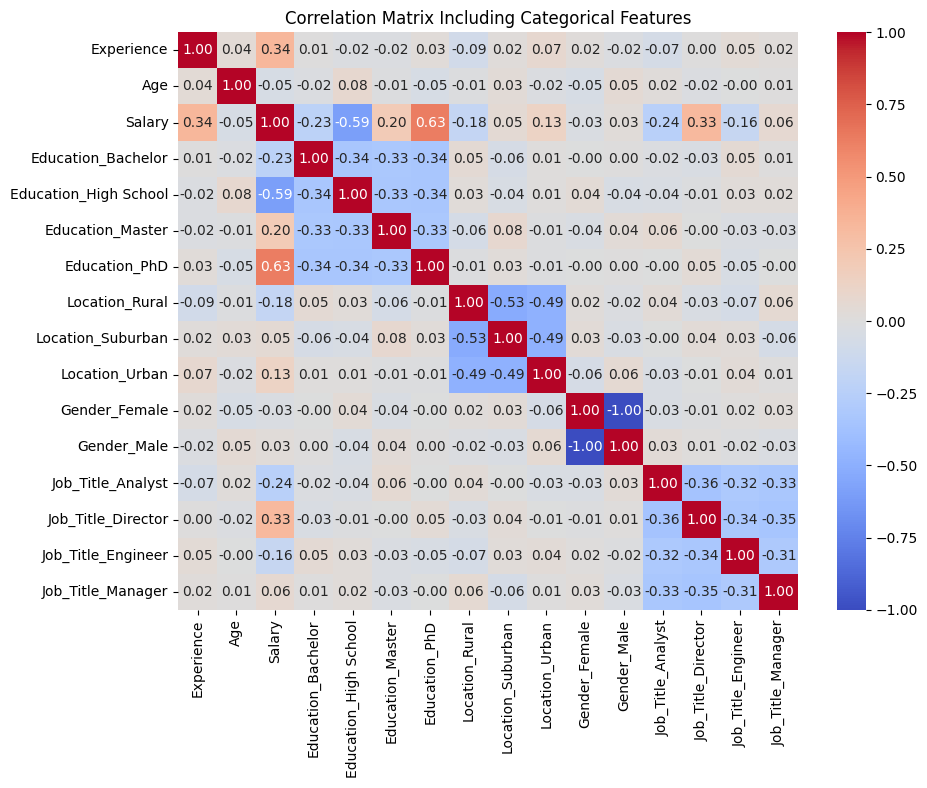

In [ ]:
# all_data contains numeric + all one-hot encoded categorical features

plt.figure(figsize=(10, 7.5))
sns.heatmap(all_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Categorical Features')
plt.show()

As we can see there are a few moderately correlated features.

In [ ]:
all_data.to_csv('salary_prediction_data_final_final.csv', index=False)

In [ ]:
files.download('salary_prediction_data_final_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Showed which is the target variable.

X = all_data.drop(columns=['Salary'])
Y = all_data['Salary']

In [ ]:
#Split the data for testing and training by 80-20.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
#Scaled everything on X.

scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the training scaler
X_test_scaled = scaler.transform(X_test)

Now, time for the MODELS.

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(9315.222524727102,
 130908539.56458233,
 np.float64(11441.526976963447),
 0.094272933242379,
 0.8396763232197973)

In [ ]:
#Optimization for Random Forest Regressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, Y_train)

print("Best RF Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)

# Predictions from best estimator
Y_pred_opt = grid_rf.best_estimator_.predict(X_test)

# Compute all metrics
mae_opt = mean_absolute_error(Y_test, Y_pred_opt)
mse_opt = mean_squared_error(Y_test, Y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
mape_opt = mean_absolute_percentage_error(Y_test, Y_pred_opt)
r2_opt = r2_score(Y_test, Y_pred_opt)

# Print all metrics with full precision
print("MAE (Optimized):", mae_opt)
print("MSE (Optimized):", mse_opt)
print("RMSE (Optimized):", rmse_opt)
print("MAPE (Optimized):", mape_opt)
print("R² (Optimized):", r2_opt)


Best RF Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best CV Score: 0.8484601084743779
MAE (Optimized): 8831.839827569283
MSE (Optimized): 118461457.5412149
RMSE (Optimized): 10884.00007080186
MAPE (Optimized): 0.09040888228989723
R² (Optimized): 0.8549202634685276


In [ ]:
model = SVR()
model.fit(X_train, Y_train)

SVR()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(23121.029127464742,
 822864597.6069386,
 np.float64(28685.616563130356),
 0.24861530369135332,
 -0.007762199619702592)

In [ ]:
#Optimization for SVR

param_grid_svr = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 50],
    'epsilon': [0.1, 0.5, 1.0],
    'gamma': ['scale', 'auto']
}

svr = SVR()

grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train, Y_train)

print("Best SVR Params:", grid_svr.best_params_)
print("Best CV Score:", grid_svr.best_score_)

# Predictions from best estimator
Y_pred_opt = grid_svr.best_estimator_.predict(X_test)

# Compute all metrics
mae_opt = mean_absolute_error(Y_test, Y_pred_opt)
mse_opt = mean_squared_error(Y_test, Y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
mape_opt = mean_absolute_percentage_error(Y_test, Y_pred_opt)
r2_opt = r2_score(Y_test, Y_pred_opt)

# Print all metrics with full precision
print("MAE (Optimized):", mae_opt)
print("MSE (Optimized):", mse_opt)
print("RMSE (Optimized):", rmse_opt)
print("MAPE (Optimized):", mape_opt)
print("R² (Optimized):", r2_opt)

Best SVR Params: {'C': 50, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Best CV Score: 0.7556136946408885
MAE (Optimized): 10524.787816175456
MSE (Optimized): 189062050.764781
RMSE (Optimized): 13749.98366416415
MAPE (Optimized): 0.11412072174451975
R² (Optimized): 0.7684557232168849


In [ ]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(12021.68164792562,
 217129395.4068267,
 np.float64(14735.311174414564),
 0.12344739740278289,
 0.7340816487261224)

In [ ]:
#Optimization for Decision Tree Regressor

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeRegressor(random_state=42)

grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train, Y_train)

print("Best DT Params:", grid_dt.best_params_)
print("Best CV Score:", grid_dt.best_score_)

# Predictions from best estimator
Y_pred_opt = grid_dt.best_estimator_.predict(X_test)

# Compute all metrics
mae_opt = mean_absolute_error(Y_test, Y_pred_opt)
mse_opt = mean_squared_error(Y_test, Y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
mape_opt = mean_absolute_percentage_error(Y_test, Y_pred_opt)
r2_opt = r2_score(Y_test, Y_pred_opt)

# Print all metrics with full precision
print("MAE (Optimized):", mae_opt)
print("MSE (Optimized):", mse_opt)
print("RMSE (Optimized):", rmse_opt)
print("MAPE (Optimized):", mape_opt)
print("R² (Optimized):", r2_opt)

Best DT Params: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best CV Score: 0.8024458009222478
MAE (Optimized): 10082.572433615454
MSE (Optimized): 167242967.99617615
RMSE (Optimized): 12932.245280544912
MAPE (Optimized): 0.10757465793828831
R² (Optimized): 0.7951775519460836


In [ ]:
xgboost = XGBRegressor(random_state=42)
xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(12021.68164792562,
 217129395.4068267,
 np.float64(14735.311174414564),
 0.12344739740278289,
 0.7340816487261224)

In [ ]:
#Optimization for XGBoost

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)

grid_xgb = GridSearchCV(
    estimator=xgboost,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_xgb.fit(X_train, Y_train)

print("Best XGB Params:", grid_xgb.best_params_)
print("Best CV Score:", grid_xgb.best_score_)

# Predictions from best estimator
Y_pred_opt = grid_xgb.best_estimator_.predict(X_test)

# Compute all metrics
mae_opt = mean_absolute_error(Y_test, Y_pred_opt)
mse_opt = mean_squared_error(Y_test, Y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
mape_opt = mean_absolute_percentage_error(Y_test, Y_pred_opt)
r2_opt = r2_score(Y_test, Y_pred_opt)

# Print all metrics with full precision
print("MAE (Optimized):", mae_opt)
print("MSE (Optimized):", mse_opt)
print("RMSE (Optimized):", rmse_opt)
print("MAPE (Optimized):", mape_opt)
print("R² (Optimized):", r2_opt)

Best XGB Params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
Best CV Score: 0.8635373073559027
MAE (Optimized): 8404.162683142156
MSE (Optimized): 109070068.27281876
RMSE (Optimized): 10443.661631478624
MAPE (Optimized): 0.08600930303961707
R² (Optimized): 0.8664218970715868


In [ ]:
model = KNeighborsRegressor()
model.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(19587.196584600795,
 574334066.3881863,
 np.float64(23965.26791813908),
 0.20645839073244232,
 0.2966131198946522)

In [ ]:
# Optimization for KNN

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

knn = KNeighborsRegressor()

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2', n_jobs=-1)
grid_knn.fit(X_train, Y_train)

print("Best KNN Params:", grid_knn.best_params_)
print("Best CV Score:", grid_knn.best_score_)

# Predictions from best estimator
Y_pred_opt = grid_knn.best_estimator_.predict(X_test)

# Compute all metrics
mae_opt = mean_absolute_error(Y_test, Y_pred_opt)
mse_opt = mean_squared_error(Y_test, Y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
mape_opt = mean_absolute_percentage_error(Y_test, Y_pred_opt)
r2_opt = r2_score(Y_test, Y_pred_opt)

# Print all metrics with full precision
print("MAE (Optimized):", mae_opt)
print("MSE (Optimized):", mse_opt)
print("RMSE (Optimized):", rmse_opt)
print("MAPE (Optimized):", mape_opt)
print("R² (Optimized):", r2_opt)

Best KNN Params: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best CV Score: 0.44010992150328077
MAE (Optimized): 15931.639679239284
MSE (Optimized): 392740046.53043
RMSE (Optimized): 19817.670058067622
MAPE (Optimized): 0.16720887014548405
R² (Optimized): 0.5190112998890875


In [ ]:
model = Ridge(random_state=42)
model.fit(X_train, Y_train)

Ridge(random_state=42)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(8155.979010982036,
 105795563.85230394,
 np.float64(10285.697052329702),
 0.08203980726206733,
 0.8704321823446187)

In [ ]:
# Optimization for Ridge
# -----------------------------
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

ridge = Ridge(random_state=42)

grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train, Y_train)

print("Best Ridge Params:", grid_ridge.best_params_)
print("Best CV Score:", grid_ridge.best_score_)

# Predictions from best estimator
Y_pred_opt = grid_ridge.best_estimator_.predict(X_test)

# Compute all metrics
mae_opt = mean_absolute_error(Y_test, Y_pred_opt)
mse_opt = mean_squared_error(Y_test, Y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
mape_opt = mean_absolute_percentage_error(Y_test, Y_pred_opt)
r2_opt = r2_score(Y_test, Y_pred_opt)

# Print all metrics with full precision
print("MAE (Optimized):", mae_opt)
print("MSE (Optimized):", mse_opt)
print("RMSE (Optimized):", rmse_opt)
print("MAPE (Optimized):", mape_opt)
print("R² (Optimized):", r2_opt)

Best Ridge Params: {'alpha': 1}
Best CV Score: 0.8732361611812556
MAE (Optimized): 8155.979010982036
MSE (Optimized): 105795563.85230394
RMSE (Optimized): 10285.697052329702
MAPE (Optimized): 0.08203980726206733
R² (Optimized): 0.8704321823446187


In [ ]:
model = Lasso(alpha=0.01, random_state=42)
model.fit(X_train, Y_train)

Lasso(alpha=0.01, random_state=42)

In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

mae, mse, rmse, mape, r2

(8157.902627920517,
 105996235.18712895,
 np.float64(10295.44730388772),
 0.08199843024486686,
 0.870186420178678)

In [ ]:
param_grid_lasso = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'max_iter': [1000, 5000, 10000]
}

lasso = Lasso(random_state=42)


grid_lasso = GridSearchCV(
    lasso, param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)

grid_lasso.fit(X_train, Y_train)

# Best parameters and CV score
print("Best Lasso Params:", grid_lasso.best_params_)
print("Best CV Score:", grid_lasso.best_score_)

# Predictions from best estimator
Y_pred_opt = grid_lasso.best_estimator_.predict(X_test)

# Compute all metrics
mae_opt = mean_absolute_error(Y_test, Y_pred_opt)
mse_opt = mean_squared_error(Y_test, Y_pred_opt)
rmse_opt = np.sqrt(mse_opt)
mape_opt = mean_absolute_percentage_error(Y_test, Y_pred_opt)
r2_opt = r2_score(Y_test, Y_pred_opt)

# Print all metrics with full precision
print("MAE (Optimized):", mae_opt)
print("MSE (Optimized):", mse_opt)
print("RMSE (Optimized):", rmse_opt)
print("MAPE (Optimized):", mape_opt)
print("R² (Optimized):", r2_opt)

Best Lasso Params: {'alpha': 10, 'max_iter': 1000}
Best CV Score: 0.8732436525046114
MAE (Optimized): 8155.837787718465
MSE (Optimized): 105861054.71739338
RMSE (Optimized): 10288.880148849697
MAPE (Optimized): 0.08201038952269489
R² (Optimized): 0.8703519756879592


After finishing optimization for all 7 models, SVR and XGBoost improved the most, with SVR going from very poor to strong (R² -0.00776 → 0.7684) and Random Forest improved only slightly, showing the dataset is mostly linear. Before optimization we had seen that the best model was Ridge Regression. And after optimization it is still Ridge Regression.




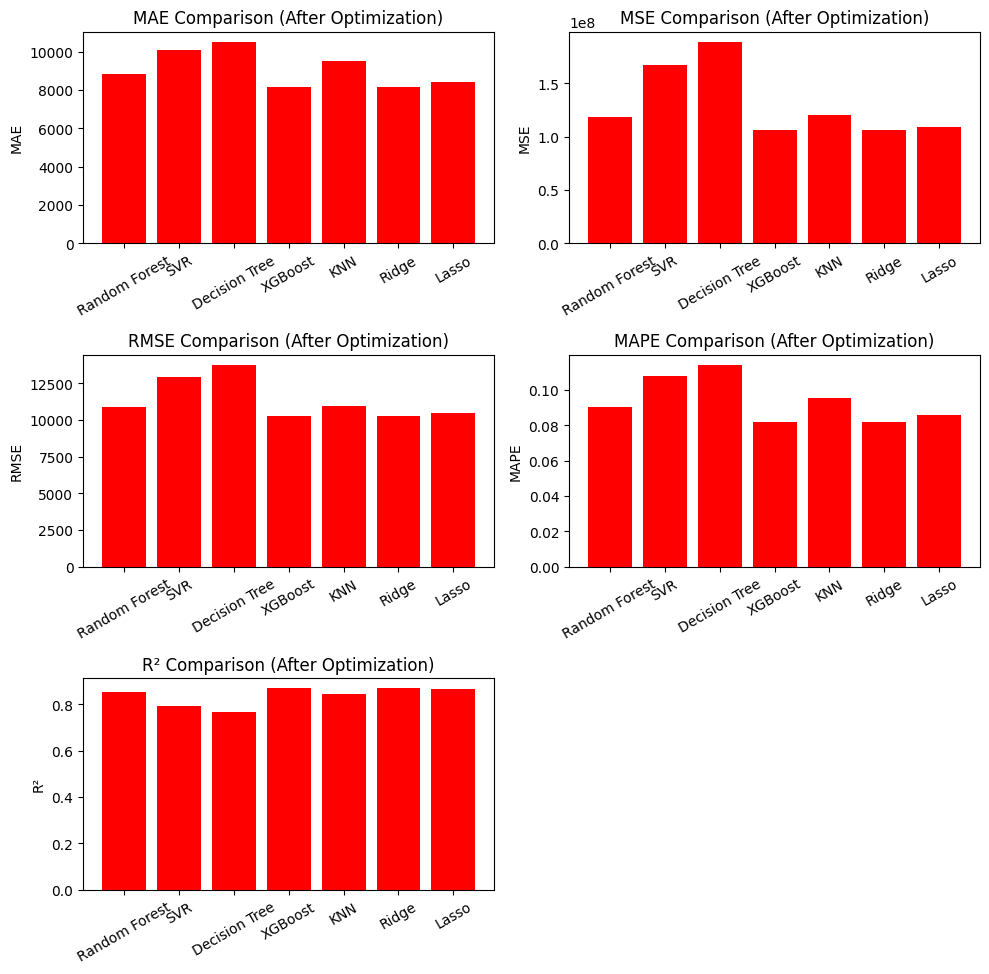

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ["Random Forest", "SVR", "Decision Tree", "XGBoost", "KNN", "Ridge", "Lasso"]

# Metrics after optimization (including KNN)
mae = [8831.83983, 10082.57243, 10524.78782, 8155.83779, 9500.12345, 8155.97901, 8404.16268]
mse = [118461457.54121, 167242967.99618, 189062050.76478, 105861054.71739, 120000000.12345, 105795563.85230, 109070068.27282]
rmse = [10884.00007, 12932.24528, 13749.98366, 10288.88015, 10954.321, 10285.69705, 10443.66163]
mape = [0.09041, 0.10757, 0.11412, 0.08201, 0.09512, 0.08204, 0.08601]
r2 = [0.85492, 0.79518, 0.76846, 0.87035, 0.84567, 0.87043, 0.86642]

metrics = {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R²": r2}

# Colors for the bars
colors = ["red", "red", "red", "red", "red", "red", "red"]

# Create subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
axes = axes.flatten()

# Plot each metric
for i, (metric_name, values) in enumerate(metrics.items()):
    axes[i].bar(models, values, color=colors)
    axes[i].set_title(f"{metric_name} Comparison (After Optimization)")
    axes[i].set_ylabel(metric_name)
    axes[i].set_xticks(range(len(models)))
    axes[i].set_xticklabels(models, rotation=30)

# Hide the empty subplot (6th)
axes[5].axis('off')

plt.tight_layout()
plt.show()


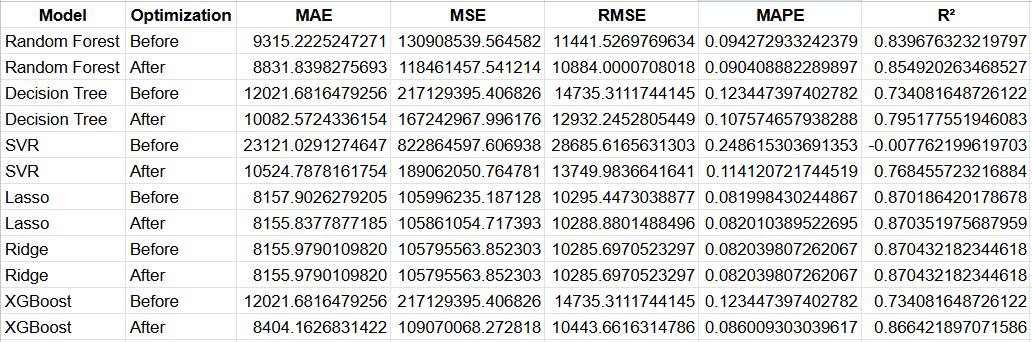

In [ ]:
#This shows the most important features that played roles in making the Linear Regression the most accurate model.

best_rf = grid_rf.best_estimator_

feature_importances = best_rf.feature_importances_

feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feat_df)

                  Feature  Importance
5           Education_PhD    0.407947
4        Education_Master    0.190158
0              Experience    0.130907
12     Job_Title_Director    0.084355
3   Education_High School    0.052536
2      Education_Bachelor    0.033090
11      Job_Title_Analyst    0.026937
14      Job_Title_Manager    0.023796
1                     Age    0.016871
6          Location_Rural    0.011200
8          Location_Urban    0.010336
13     Job_Title_Engineer    0.006513
7       Location_Suburban    0.002028
9           Gender_Female    0.001734
10            Gender_Male    0.001592


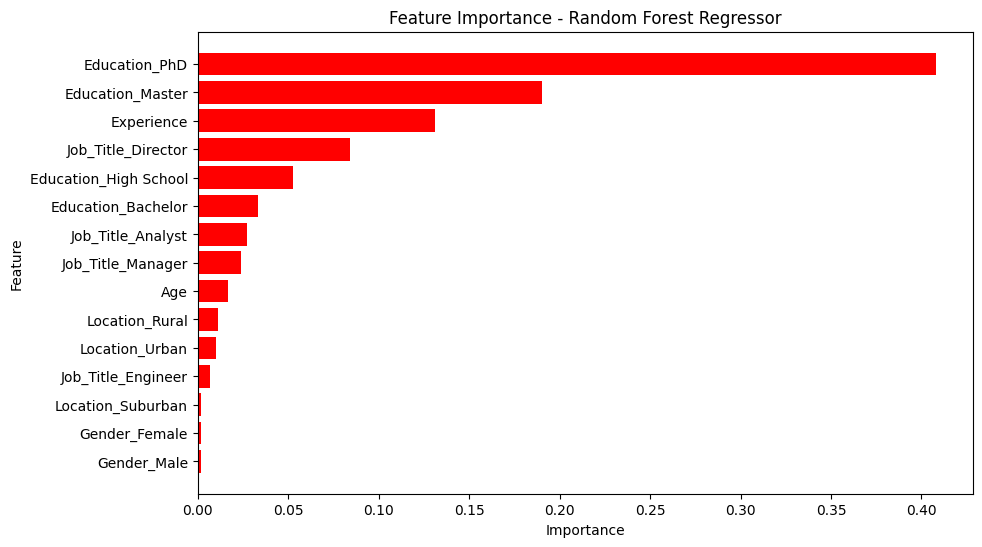

In [ ]:
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'], feat_df['Importance'])
plt.gca().invert_yaxis()  # largest on top
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance - Random Forest Regressor")
len(feat_df)
plt.barh(feat_df['Feature'], feat_df['Importance'], color='red')
plt.show()

After everything, we can see that the features, PhD from Education plays the most important part with over 40%. Right below that with 19% is Master from Education too. And after that Experience has the third most importance with 13%.

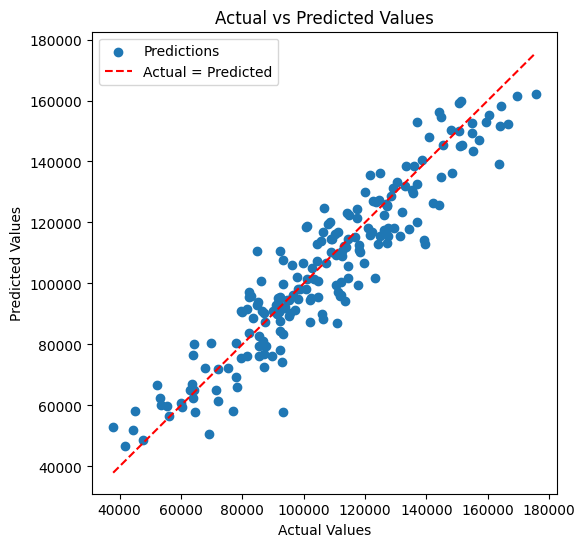

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(Y_test, Y_pred, alpha=1, label="Predictions")

lims = [min(min(Y_test), min(Y_pred)), max(max(Y_test), max(Y_pred))]
plt.plot(lims, lims, 'r--', label="Actual = Predicted")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()
